In [1]:
#######
# IMPORT PACKAGES
#######
!pip install praw
import praw
import pandas as pd



     |████████████████████████████████| 163kB 5.7MB/s 
     |████████████████████████████████| 61kB 3.4MB/s 


In [2]:
pwd = '/content/gdrive'
from google.colab import drive
drive.mount(pwd)

Mounted at /content/gdrive


In [3]:
df= pd.read_csv("/content/gdrive/MyDrive/Excel file tweets/2015_Tweets_Labelled.csv")
# , encoding='utf-8'
df.head()

Unnamed: 0  ... label
0      22742  ...   0.0
1      24588  ...   1.0
2      23549  ...   0.0
3      23468  ...   1.0
4      23761  ...   0.0

[5 rows x 7 columns]

In [70]:
df

Unnamed: 0  ... label
0         22742  ...   0.0
1         24588  ...   1.0
2         23549  ...   0.0
3         23468  ...   1.0
4         23761  ...   0.0
...         ...  ...   ...
1794      25215  ...   0.0
1795      22975  ...   0.0
1796      23077  ...   0.0
1797      23092  ...   0.0
1798      23121  ...   0.0

[1799 rows x 7 columns]

In [4]:
!pip install text2emotion

import text2emotion as te

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 133kB 6.3MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
list_x = []
for i in df["BERT_processed_text"]:
    i = str(i)
    list_x.append(i)
df["x"] = list_x 
df

Unnamed: 0  ...                                                  x
0         22742  ...  [CLS] 🔻2   M I L L I O N   G / A🔻#1  🔹 https:/...
1         24588  ...  [CLS] Today my other half took off to spend ti...
2         23549  ...  [CLS] @jieyingyau my teammate all early take l...
3         23468  ...  [CLS] I need to sleep but cannot stop laughing...
4         23761  ...  [CLS] Good morning, Singapore! :) #Sunrise 06:...
...         ...  ...                                                ...
1794      25215  ...                              [CLS] @Juunhong mommy
1795      22975  ...                           [CLS] @megat_harris same
1796      23077  ...          [CLS] Goodnight 😔  http://t.co/CxyxPwNCyV
1797      23092  ...  [CLS] “@GirlfriendNotes: THIS 🙌💗👌  http://t.co...
1798      23121  ...                                  [CLS] Goodnight 😴

[1799 rows x 8 columns]

In [12]:
def emotion_function(text):
    return te.get_emotion(text)

df['Tweets_Emotion'] = df['x'].apply(emotion_function)

df


Unnamed: 0  ...                                     Tweets_Emotion
0         22742  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1         24588  ...  {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.5, ...
2         23549  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
3         23468  ...  {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.5,...
4         23761  ...  {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
...         ...  ...                                                ...
1794      25215  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1795      22975  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1796      23077  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1797      23092  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1798      23121  ...  {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...

[1799 rows x 9 columns]

In [13]:
df2 = pd.json_normalize(df['Tweets_Emotion'])

df2.tail()
new_df=df2.join(df)
pd.set_option('display.max_colwidth', None)
# new_df.tail(40)


In [14]:
dict_of_emotions = {"Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0}
for i in df["Tweets_Emotion"]:
    for key, value in i.items():
        if key in dict_of_emotions and value == 1:
            dict_of_emotions[key] += 1
dict_of_emotions

{'Angry': 22, 'Fear': 206, 'Happy': 129, 'Sad': 140, 'Surprise': 103}

In [ ]:
import matplotlib.pyplot as plot

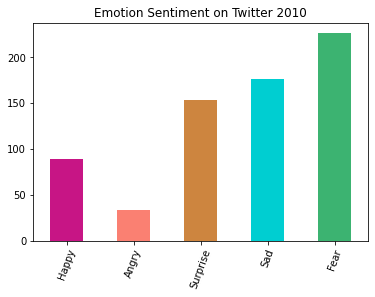

In [ ]:
df2.sum().plot.bar(rot=70, title="Singapore Emotion Sentiment on Twitter 2010",color=['mediumvioletred', 'salmon', 'peru', 'darkturquoise', 'mediumseagreen']);

plot.show(block=True);

In [ ]:
import re 
import string

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [ ]:
df_clean = pd.DataFrame(df['Comments'].apply(clean_text_round1))
df_clean.head()


Comments
0  worried that i wouldn’t be able to find a job ...
1  better to extend than going halffuck and waste...
2   i understand but feels like something died in me
3  kinda expected but was still harboring a glimp...
4  most logical choice to make at least my worst ...

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])


df_clean = pd.DataFrame(df_clean['Comments'].apply(clean_text_round2))
df_clean.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Comments
0          worried wouldn’t able find job start work
1  better extend going halffuck waste cb im suppo...
2               understand feels like something died
3  kinda expected still harboring glimpse hope of...
4  logical choice make least worst fear full lock...

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

def clean_text_round3_lemmatize(text):
    
    tokenization = nltk.word_tokenize(text)
    lemmtized_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in tokenization])
    return lemmtized_text


df_clean = pd.DataFrame(df_clean['Comments'].apply(clean_text_round3_lemmatize))
df_clean
# see the changes like families --> family, benches-->bench 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Comments
0          worried wouldn ’ t able find job start work
1    better extend going halffuck waste cb im suppo...
2                  understand feel like something died
3    kinda expected still harboring glimpse hope of...
4    logical choice make least worst fear full lock...
..                                                 ...
234  evidence suggests coronavirus originated bat c...
235  company landlord footprint tiny guarantee reit...
236  wasnt made lab conspiracy theory current evide...
237  didnt say read quote said likely came bat sayi...
238  im saying eating bat nothing implied first com...

[239 rows x 1 columns]

In [ ]:
import emoji
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

df_clean['clean_text_wo_emoji'] = pd.DataFrame(df_clean['Comments'].apply(give_emoji_free_text))
df_clean

Comments  \
0          worried wouldn ’ t able find job start work   
1    better extend going halffuck waste cb im suppo...   
2                  understand feel like something died   
3    kinda expected still harboring glimpse hope of...   
4    logical choice make least worst fear full lock...   
..                                                 ...   
234  evidence suggests coronavirus originated bat c...   
235  company landlord footprint tiny guarantee reit...   
236  wasnt made lab conspiracy theory current evide...   
237  didnt say read quote said likely came bat sayi...   
238  im saying eating bat nothing implied first com...   

                                   clean_text_wo_emoji  
0          worried wouldn ’ t able find job start work  
1    better extend going halffuck waste cb im suppo...  
2                  understand feel like something died  
3    kinda expected still harboring glimpse hope of...  
4    logical choice make least worst fear full lock...  
..                                                 ...  
234  evidence suggests coronavirus originated bat c...  
235  company landlord footprint tiny guarantee reit...  
236  wasnt made lab conspiracy theory current evide...  
237  didnt say read quote said likely came bat sayi...  
238  im saying eating bat nothing implied first com...  

[239 rows x 2 columns]

In [ ]:
import csv
import datetime
import emoji
import xlsxwriter

# Importing analysis libraries 
import nltk
import tweepy
import json

# Importing visualisation libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import seaborn as sns 
import string
import nltk
import os


from tweepy import OAuthHandler
from wordcloud import WordCloud, STOPWORDS


nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()
import operator


df_clean['wordlist'] = df_clean['clean_text_wo_emoji'].apply(lambda x: x.split())

words_count_dict = defaultdict(int)
for words in df_clean['wordlist']:
    for word in words:
        words_count_dict[word] += 1

words_count_dict = defaultdict(int)

for clean_text in df_clean['clean_text_wo_emoji']:
    for w in clean_text.split():
        words_count_dict[w] += 1

for (word, count) in sorted(words_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:30]:
    if word.isalnum():
        print (word,count)

im 58
get 40
like 40
still 35
job 33
even 33
home 33
go 32
people 31
really 29
work 28
cb 28
going 27
feel 26
week 26
time 25
since 24
month 23
t 22
well 20
s 20
much 20
year 20
take 18
know 18
friend 18
business 17
also 17
stay 17


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cleaned_string = " ".join(one_row for one_row in df_clean['clean_text_wo_emoji'])
cleaned_string

'worried wouldn ’ t able find job start work better extend going halffuck waste cb im supportive extending unnecessarily agree minister nowhere near safe yet think handling cb well gradual finetuning restriction based current data think people getting used cb unfortunately fear even business going collapse hope get necessary aid tide period understand feel like something died kinda expected still harboring glimpse hope official logical choice make least worst fear full lockdown coming true yet don ’ t want called nsmen set barricade patrol street worried business finally collapsing financial stuff im fine girlfriend going nut understand really really suck dad sole breadwinner family income cb lift mental health feel cooped home real frustrated parent always fighting thing getting kind bad still want go holiday booked long ago airline wont refund feel frustrated even listening mum keep believing random whatsapp message forward parttime job laid last month final approaching really cravin

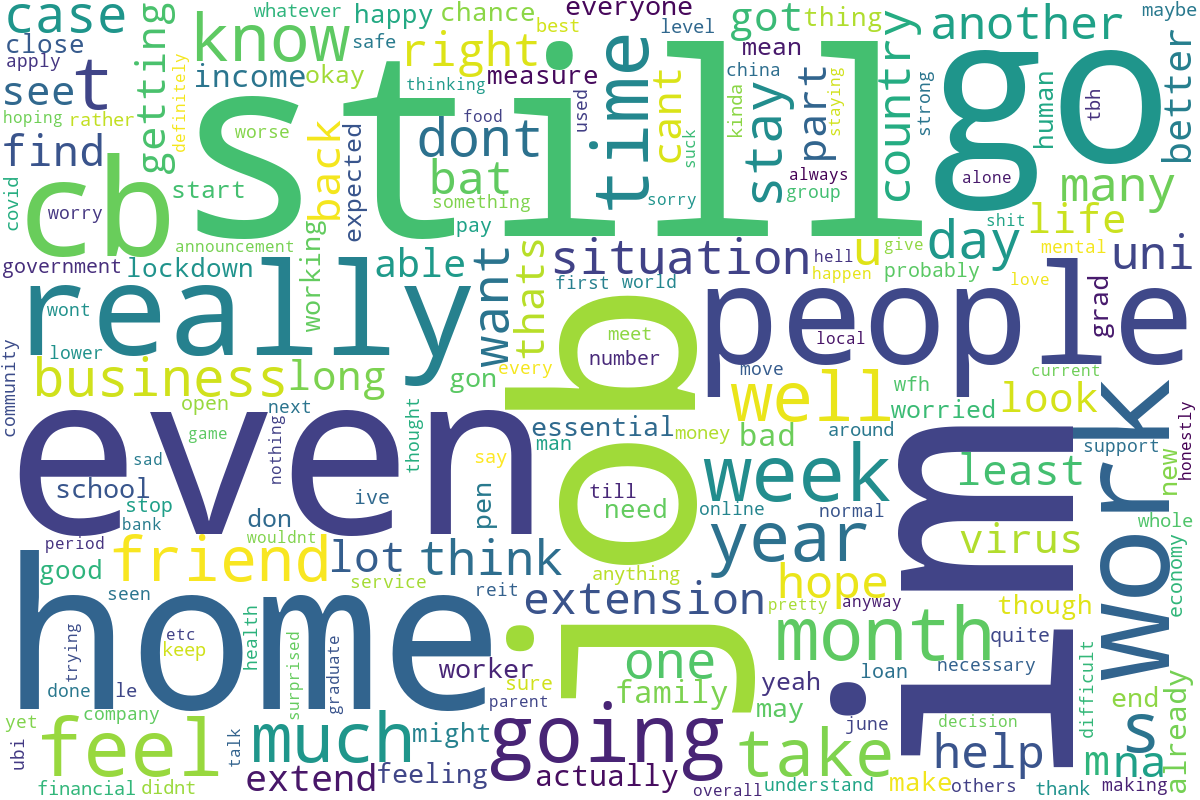

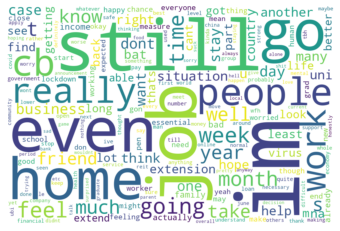

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1200, height=800,collocations=False).generate(cleaned_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_image()
